In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

OSEMN Pipeline

O - Obtaining our data

S - Scrubbing / Cleaning our data

E - Exploring / Visualizing our data will allow us to find patterns and trends

M - Modeling our data will give us our predictive power as a wizard

N - Interpreting our data

# Data Preprocessing

In [2]:
df = pd.DataFrame(pd.read_csv("data/diabetes.csv"))

**DataFrame.describe()** method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:
* count tells us the number of NoN-empty rows in a feature.

* mean tells us the mean value of that feature.

* std tells us the Standard Deviation Value of that feature.

* min tells us the minimum value of that feature.

* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile 

* information helps us to detect Outliers.

* max tells us the maximum value of that feature.

In [3]:
#displaying the head of dataset
df.head()   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#description of dataset
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#768 rows and 9 columns
df.shape 

(768, 9)

In [8]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
#checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [13]:
df.isnull().all()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [14]:
#It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values
df_new = df.copy(deep = True)
df_new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_new.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [15]:
#Listing of 10 largest values for that field
df.nlargest(10,['BloodPressure'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
106,1,96,122,0,0,22.4,0.207,27,0
691,13,158,114,0,0,42.3,0.257,44,1
43,9,171,110,24,240,45.4,0.721,54,1
177,0,129,110,46,130,67.1,0.319,26,1
549,4,189,110,31,0,28.5,0.680,37,0
84,5,137,108,0,0,48.8,0.227,37,1
362,5,103,108,37,0,39.2,0.305,65,0
658,11,127,106,0,0,39.0,0.190,51,0
662,8,167,106,46,231,37.6,0.165,43,1
672,10,68,106,23,49,35.5,0.285,47,0


In [16]:
#Standardize the variable
df_new = df.std()

In [17]:
df_new

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

In [18]:
df_new.mean()

22.927432797872843

In [19]:
df_new.std()

36.07925076113047

In [20]:
df_new.isnull().any()

False

In [21]:
df_new.isnull().all()

False

# Exploratory Data Analysis


In [22]:
df.corr() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

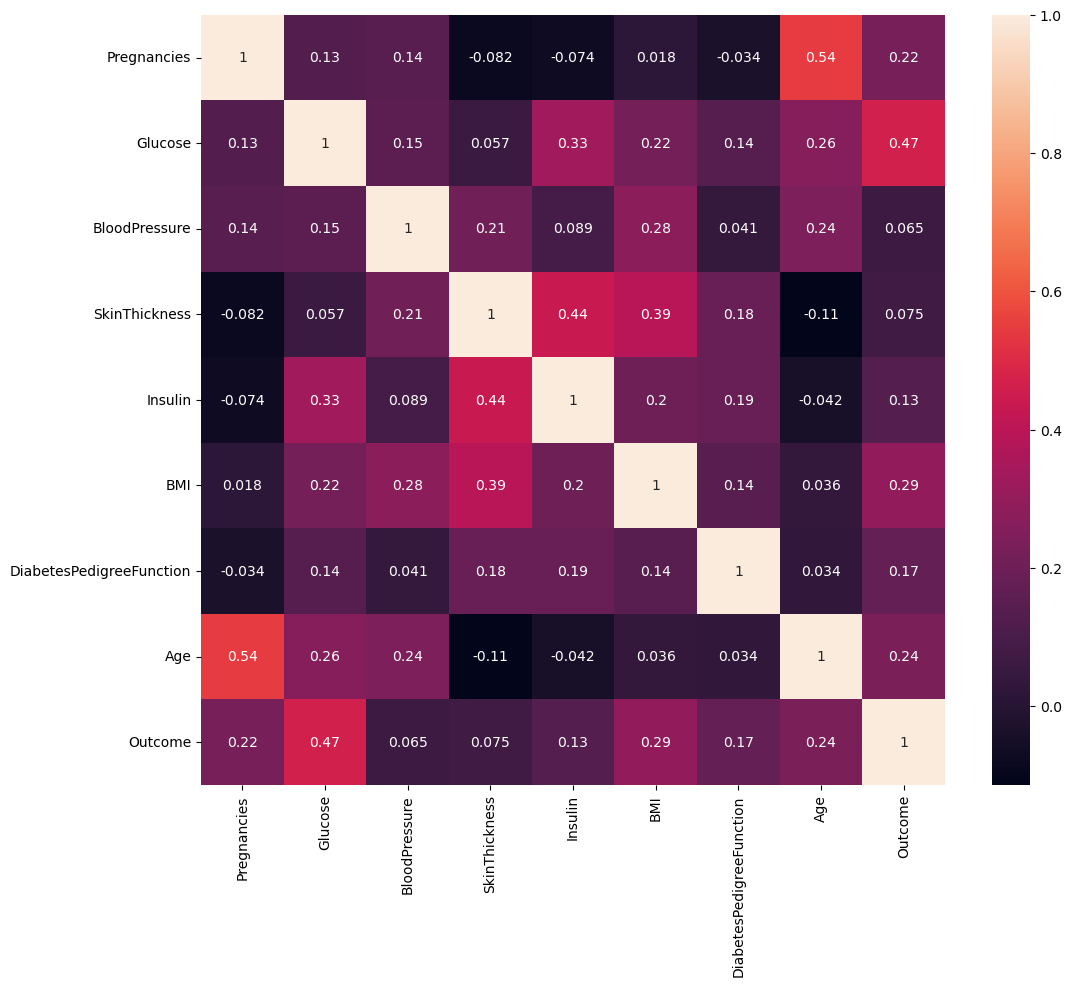

In [23]:
#A **heat map** is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.
#correlation
# we can see skin thickness,insulin,pregnencies and age are full independent to each other
#age and pregencies has negative correlation
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot = True)

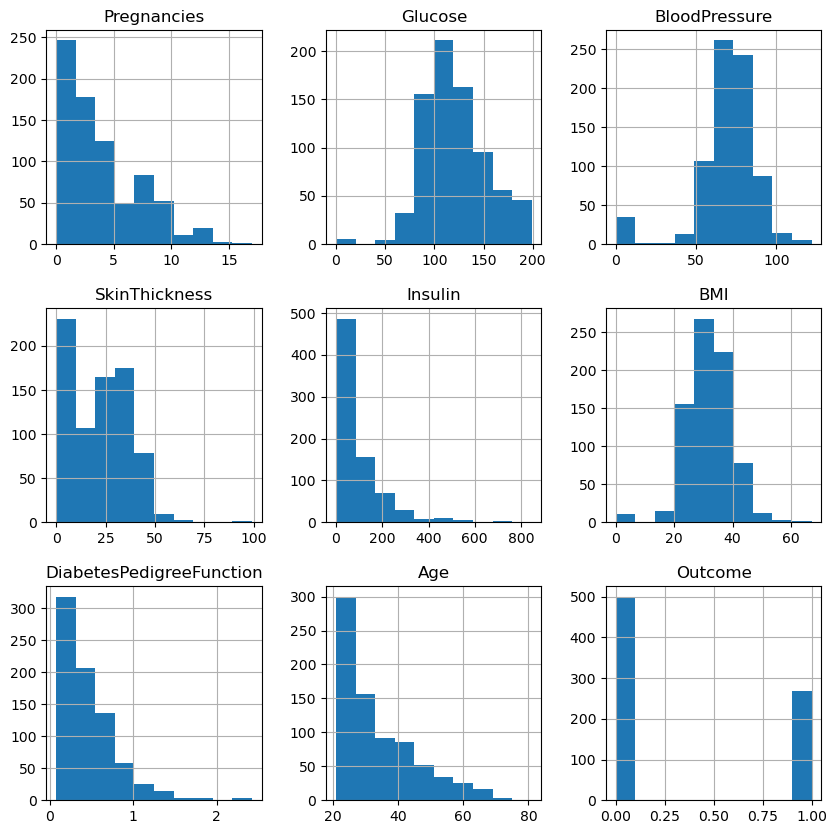

In [24]:
#Histogram
df.hist(figsize = (10,10))
plt.show()

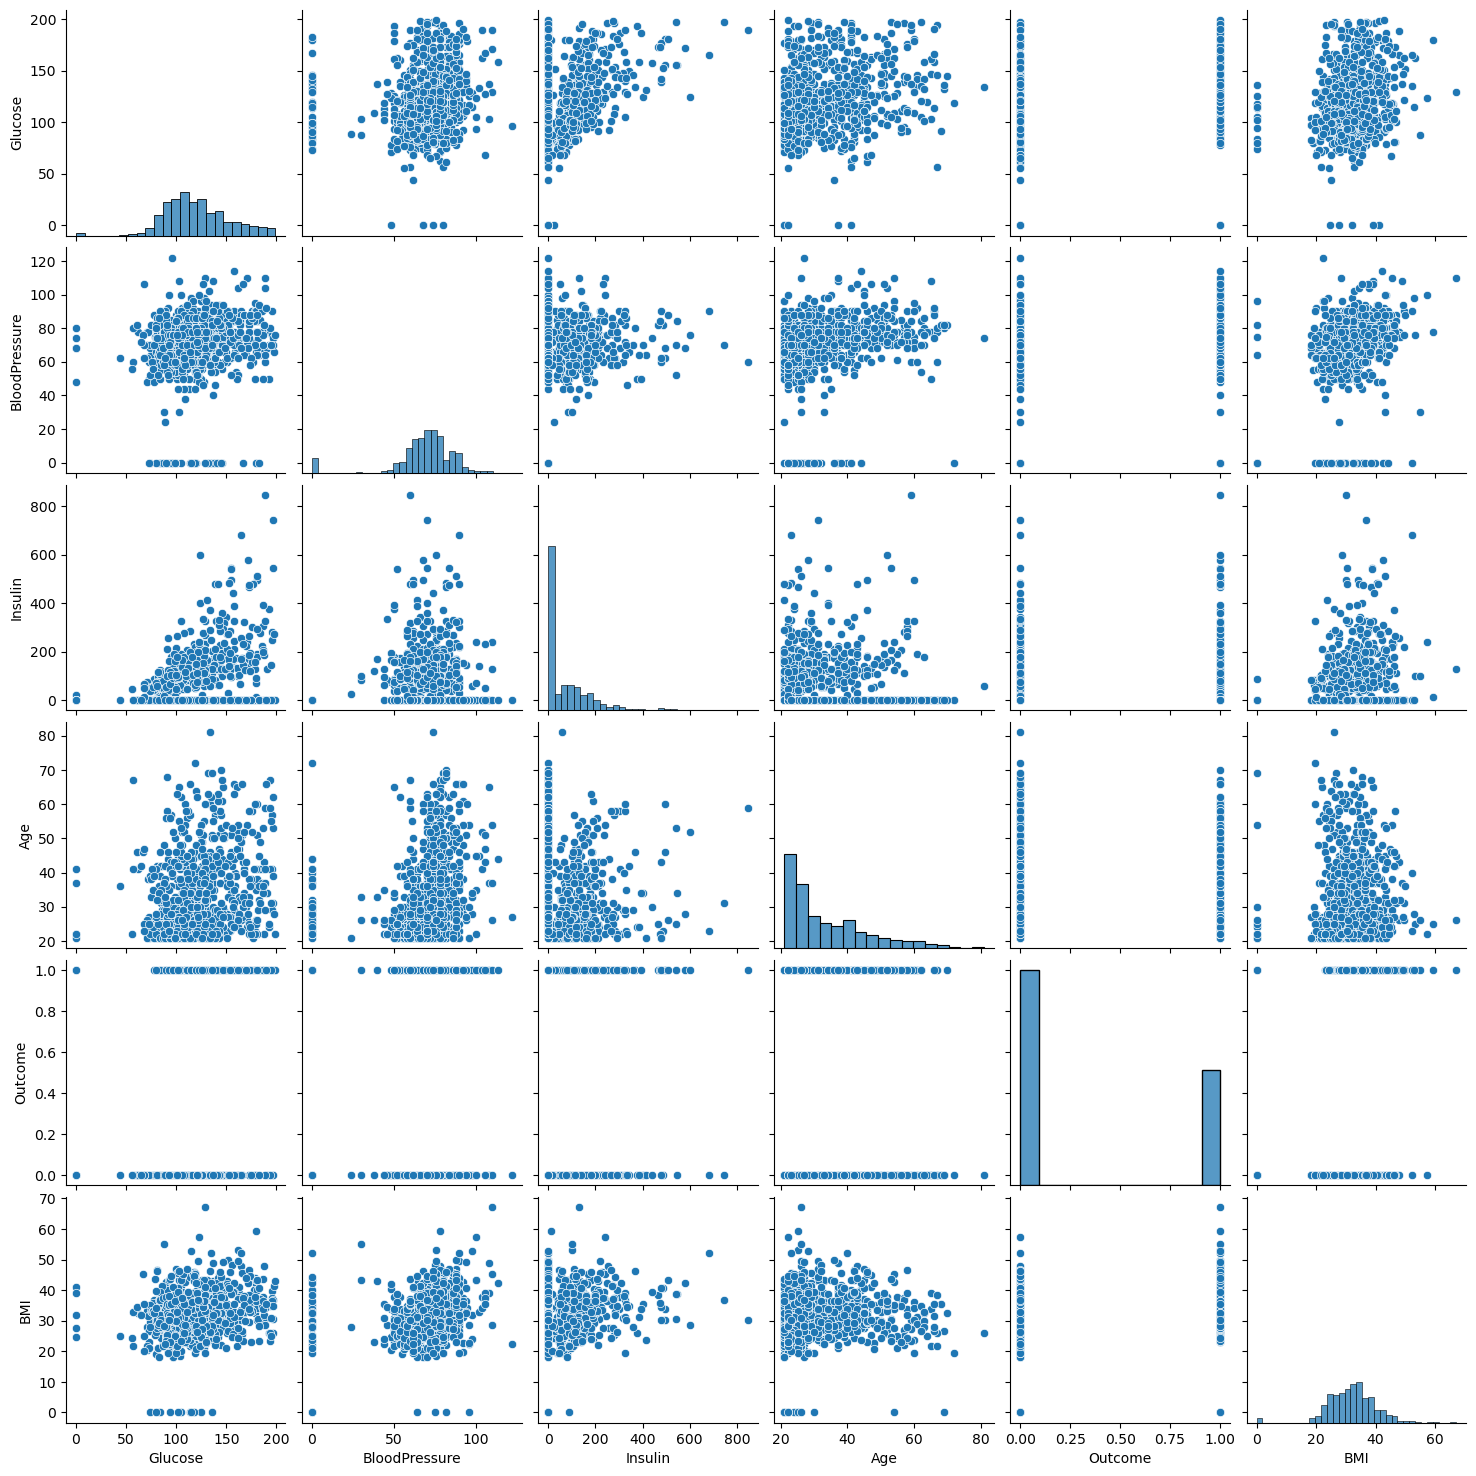

In [25]:
#pairplot
mean_col = ['Glucose','BloodPressure','Insulin','Age','Outcome','BMI']
sns.pairplot(df[mean_col],palette = 'Accent')

<Axes: xlabel='BMI', ylabel='Glucose'>

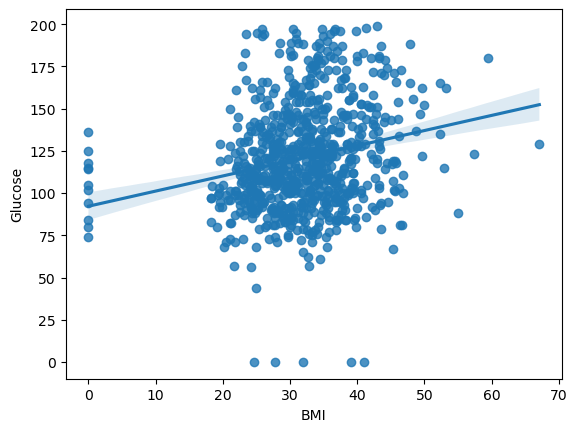

In [26]:
sns.regplot(x='BMI',y='Glucose', data=df)

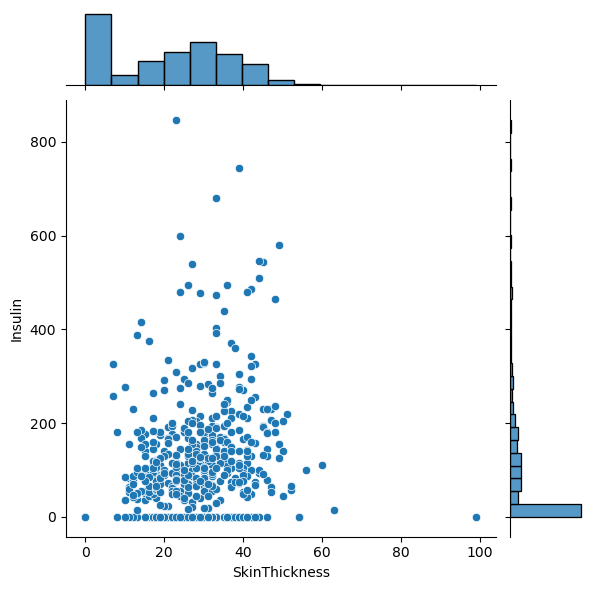

In [27]:
#scatterplot
sns.jointplot(x='SkinThickness', y='Insulin', data=df)

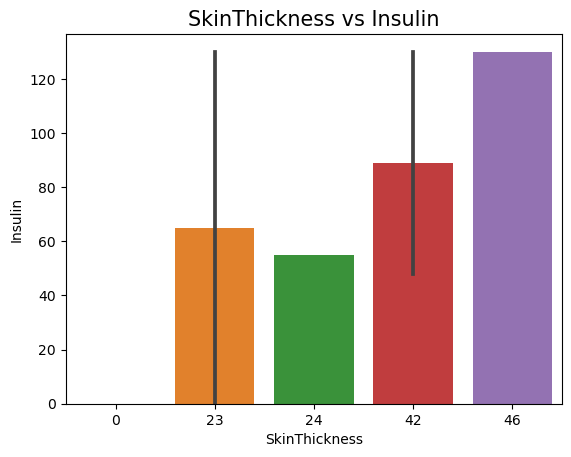

In [28]:
#barplot
sns.barplot(x='SkinThickness', y='Insulin', data=df[170:180])
plt.title("SkinThickness vs Insulin", fontsize=15)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")

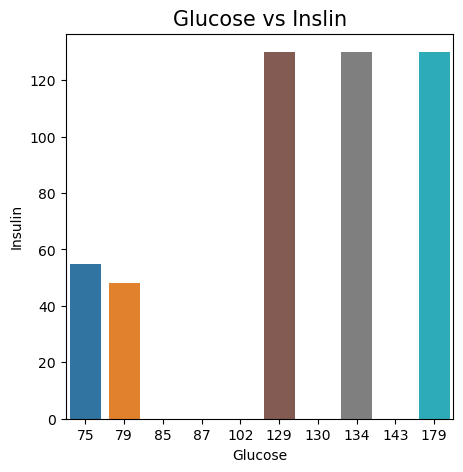

In [29]:
#barplot
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x='Glucose', y='Insulin', data=df[170:180])
plt.title("Glucose vs Inslin", fontsize=15)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

<Axes: xlabel='count', ylabel='Outcome'>

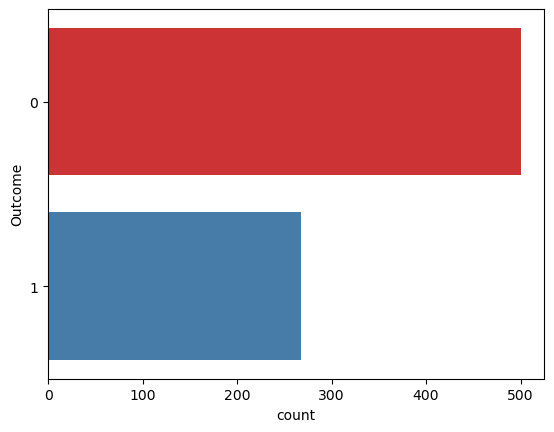

In [30]:
# Lets count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=df['Outcome'],palette='Set1')

In [ ]:
sns.set(style="ticks")
sns.pairplot(df, hue="Outcome")

In [ ]:
#box plot for outlier visualization
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

In [ ]:
#box plot
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()

In [ ]:
#outlier remove

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

#print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))

In [ ]:
#outlier remove
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape
#more than 80 records deleted

In [ ]:
#Scatter matrix after removing outlier
sns.set(style="ticks")
sns.pairplot(df_out, hue="Outcome")
plt.show()

In [ ]:
# visualizing distribution of Y feature (predictive variable)
plt.figure(figsize=(10,7))
df_out.Outcome.value_counts().sort_index().plot.bar()
diabetic_rate = df_out.Outcome.mean()
plt.title(f"Overall diabetes diagnosis rate: {diabetic_rate:.2%}", size=17)
plt.xlabel('Is diabetic?', size=17)
plt.ylabel('Count of Patients', size=17)

# Data Modeling

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
#lets extract features and targets
X=df_out.drop(columns=['Outcome'])
y=df_out['Outcome']

In [ ]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_test, y_pred): return confusion_matrix(y_test, y_train)[0, 0]
def fp(y_test, y_pred): return confusion_matrix(y_test, y_pred)[0, 1]
def fn(y_test, y_pred): return confusion_matrix(y_test, y_pred)[1, 0]
def tp(y_test, y_pred): return confusion_matrix(y_test, y_pred)[1, 1]

In [ ]:
#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

In [ ]:
#Perform 2 sample z-test
from statsmodels.stats.weightstats import ztest as ztest
ztest(X_train['BMI'],X_train['Age'],value=0)

# Implementation of Statistical Hypothesis Test using Scipy and Sci-kit

In [ ]:
!pip install researchpy 
import researchpy as rp

In [ ]:
df.groupby("Outcome").agg({"Glucose":[np.mean, np.std, np.size]})

In [ ]:
df_glucose = df[['Glucose', 'Outcome']]

In [ ]:
df_glucose["Outcome"].replace({1: "Diabetes", 0: "NotDiabetes"}, inplace=True)
df_glucose
# Need to convert 1 and 0 in Outcome column to Diabetes and NotDiabetes respectively for further hypothesis testing

In [ ]:
rp.ttest(group1= df_glucose['Glucose'][df_glucose['Outcome'] == 'Diabetes'], group1_name= "Diabetes",
         group2= df_glucose['Glucose'][df_glucose['Outcome'] == 'NotDiabetes'], group2_name= "NotDiabetes")

In [ ]:
from scipy.stats import norm
mu, std = norm.fit(df_glucose['Glucose'])
plt.figure(figsize = [12, 8])
sns.distplot(df_glucose['Glucose'], hist=True, kde=True, 
             bins=25, color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("Glucose", size=15)
plt.ylabel("Density", size=15);

In [ ]:
import scipy.stats as st
Mu = 72.4   
# Std = ?  Population standard deviatin is unknown

x = df['BloodPressure']  # Storing values in a list to avoid long names
est_pop_std = np.sqrt(np.sum(abs(x - x.mean())**2) / (df.size - 1))     #  sqrt(sum(xi - Xbar)^2 / (n -1))

sample_avg_bp =(df['BloodPressure']).mean()

std_error_bp = est_pop_std / np.sqrt(df.size) # Standard dev of the sampling mean distribution... estimated from population

T_Statistic = (( sample_avg_bp - Mu) / std_error_bp)

pvalue = st.t.sf(np.abs(T_Statistic), df.size-1)*2
print("Estimated Pop Stand Dev" , est_pop_std)
print("Sample Avg BP : " , sample_avg_bp)
print("Standard Error: " , std_error_bp)
print("T Statistic" , T_Statistic)
print("Pval" , pvalue)

if pvalue > 0.05:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')

In [ ]:
df_mod = df.copy()
df_mod['BloodPressure'] = df_mod['BloodPressure'].mask(df['BloodPressure'] == 0,df['BloodPressure'].median())

In [ ]:
from scipy.stats import ttest_ind

stat, pvalue = ttest_ind(df_mod['BloodPressure'] , df['BloodPressure'])
print("compare means", df_mod['BloodPressure'].mean() , df['BloodPressure'].mean())
print("Tstatistic , Pvalue", stat, pvalue)

if pvalue > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
numerical=df.select_dtypes(include=['int64','float']).columns.tolist()
print(numerical)

In [ ]:
df.describe().T.round(2)

In [ ]:
##importing stats module from scipy
from scipy import stats
## retrieving p value from normality test function
PregnanciesPVAL=stats.normaltest(df.Pregnancies).pvalue
GlucosePVAL=stats.normaltest(df.Glucose).pvalue
BloodPressurePVAL=stats.normaltest(df.BloodPressure).pvalue
SkinThicknessPVAL=stats.normaltest(df.SkinThickness).pvalue
InsulinPVAL=stats.normaltest(df.Insulin).pvalue
BMIPVAL=stats.normaltest(df.BMI).pvalue
DiaPeFuPVAL=stats.normaltest(df.DiabetesPedigreeFunction).pvalue
AgePVAL=stats.normaltest(df.Age).pvalue
## Printing the values
print("Pregnancies P Value is " + str(PregnanciesPVAL))
print("Glucose P Value is " + str(GlucosePVAL))
print("BloodPressure P Value is " + str(BloodPressurePVAL))
print("Skin Thickness P Value is " + str(SkinThicknessPVAL))
print("Insulin P Value is " + str(InsulinPVAL))
print("BMI P Value is " + str(BMIPVAL))
print("Diabetes Pedigree Function P Value is " + str(DiaPeFuPVAL))
print("Age P Value is " + str(AgePVAL))

# Regression Analysis

In [ ]:
#Lets build the model
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics


from sklearn.metrics import plot_confusion_matrix
model = LogisticRegression(solver='liblinear')
# instantiate the model 

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)

print(model_score)

In [ ]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues);
# Confusion 

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, y_predict)
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, y_predict)
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, y_predict)
print("F1 Score: %.3f" % f1)

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Logistic Regression (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4)
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title("Receiver Operatinng Characteristics", size = 25)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4, fontsize='xx-large')
plt.show()
# AUC score for LR model is 0.807


In [ ]:
print(metrics.classification_report(y_test,y_predict))

In [ ]:
coeff = list(model.coef_[0])
labels = list(X_test.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance');

# Classification modelling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

In [ ]:
#Result Visualisation
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')
#The best result is captured at k = 11 hence 11 is used for the final model

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

In [ ]:
## trying to plot decision boundary 
from mlxtend.plotting import plot_decision_regions
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

In [ ]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#classification_report
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
roc_auc_score(y_test,y_pred_proba)

# Clustering

In [ ]:
#K-Mean
#Age and BMI Cluster
# elbow test to determine n
from sklearn.cluster import KMeans

# features to predict cluster on, only fitting model on X(train)
X = X_train[['Age','BMI']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 18)}).plot(marker='x')
    plt.xticks(range(2, 18))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
# feature to create cluster on, only fitting model on X(train)
X = X_train[['Pregnancies']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 18)}).plot(marker='x')
    plt.xticks(range(2, 18))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    
# will start with 4 clusters

In [ ]:
# features to predict cluster on, only fitting model on X(train)
X = X_train[['Insulin','Glucose']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 18)}).plot(marker='x')
    plt.xticks(range(2, 18))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    
# will start with 5 clusters

In [ ]:
# features to predict cluster on, only fitting model on X(train)
X = X_train[['Glucose']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 18)}).plot(marker='x')
    plt.xticks(range(2, 18))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    
# will start with 5 clusters

# Using any machine learning techniques using available data set to develop a recommendation system.
 


In [ ]:
#XGBoost
from xgboost import XGBClassifier

xgb_model =XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

In [ ]:
xgb_pred = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))
#XGBoost seems to be doing well with an accuracy score of 0.7795.

In [ ]:
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

In [ ]:
xgb_model.feature_importances_

In [ ]:
(pd.Series(xgb_model.feature_importances_).plot(kind='barh'))

In [ ]:
#Predction
#printing the prediction probabities for the the test data
print('Prediction Probabilities')
xgb_model.predict_proba(X_test)

# Exploratory data analysis using Apache Spark and Pandas

In [ ]:
!pip install pyspark

In [ ]:
import pyspark

In [ ]:
pyspark.__version__

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-diabetes').getOrCreate()
df = spark.read.csv('diabetes.csv', header = True, inferSchema = True)
df.printSchema()

In [ ]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns).transpose()

In [ ]:
df.groupby('Outcome').count().toPandas()

In [ ]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

In [ ]:
## See if we have missing values
from pyspark.sql.functions import isnull, when, count, col

df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

In [ ]:
from pyspark.ml.feature import VectorAssembler
features = ['Pregnancies','Glucose','BloodPressure',
'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
vector_assembler = VectorAssembler(inputCols = features, 
                                   outputCol= "features")
data_training_and_test = vector_assembler.transform(df)